Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

В этом ноутбуке выполнены следующие операции с датасетом:

1) Очистка данных от нулевых и NaN значений

2) Поиск и очистка данных от выбросов

3) Поиск и очистка ошибочных значений

4) Оценка кореляций между числовыми значениями и успеваемостью учеников

5) Поиск статистически значимых различий между номинативными значениями и успеваемостью учеников


В конце ноутбука предоставлены выводы по оценках

In [203]:
#All functions that will be used in the code

#1. Function which removes the outliers for the column in the dataset
def remove_outlier(datacolumn):
  IQR = datacolumn.quantile(0.75) - datacolumn.quantile(0.25)
  perc25 = datacolumn.quantile(0.25)
  perc75 = datacolumn.quantile(0.75)
  datacolumn = datacolumn.loc[datacolumn >= perc25 - 1.5*IQR]
  datacolumn = datacolumn.loc[datacolumn <= perc75 + 1.5*IQR]
  return datacolumn


#2. Function which removes the mistake values for the column in the dataset
def remove_wrongvalue(datacolumn, maxvalue=None, minvalue=None):
  if maxvalue != None:
    datacolumn = datacolumn.loc[datacolumn <= maxvalue]
  if minvalue != None:
    datacolumn = datacolumn.loc[datacolumn >= minvalue]
  return datacolumn


#3. Function which removes the blank and NaN values for the column in the dataset
def remove_blanks(in_value):
  in_string = str(in_value)
  if (in_string.strip() == '' or in_string == 'NaN' or in_string == 'nan'):
    return None
  else:
    return in_value


#4. Function which builds the boxplot for the corresponding column and the 'score' column
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (4, 2))
    sns.boxplot(x=column, y='score', 
                data=stud_math.loc[stud_math.loc[:, column].isin(stud_math.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()


#5. Function which performs a statistics Students test to define the column with the highest differentiator
def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index[:20]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'], 
                        stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

#Python notebook is used in Google Collab online
!wget 'https://lms.skillfactory.ru/assets/courseware/v1/425d6864db937e4ebabc972e581769ab/asset-v1:Skillfactory+DST-WEEKLY-2.0+08JULY2020+type@asset+block/stud_math.csv' -O stud_math.csv
stud_math = pd.read_csv('stud_math.csv')

--2020-11-02 17:48:13--  https://lms.skillfactory.ru/assets/courseware/v1/425d6864db937e4ebabc972e581769ab/asset-v1:Skillfactory+DST-WEEKLY-2.0+08JULY2020+type@asset+block/stud_math.csv
Resolving lms.skillfactory.ru (lms.skillfactory.ru)... 84.201.175.12
Connecting to lms.skillfactory.ru (lms.skillfactory.ru)|84.201.175.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47309 (46K) [application/vnd.ms-excel]
Saving to: ‘stud_math.csv’

stud_math.csv       100%[===================>]  46.20K  --.-KB/s    in 0.04s   

2020-11-02 17:48:13 (1.03 MB/s) - ‘stud_math.csv’ saved [47309/47309]



In [50]:
stud_math.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [122]:
display(stud_math.head(20))

,school,sex,age,address,family_size,parents_status,mother_edu,father_edu,mother_job,father_job,reason,guardian,travel_time,study_time,failures,school_sup,family_sup,paid_classes,activities,nursery,higher,internet,romantic,family_rel,free_time,go_out,health,absences,score
0,GP,F,18.0,U,None,separate,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,None,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17.0,U,more_than_3,None,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15.0,U,less_or_equal_3,together,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,None,no,yes,yes,yes,None,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15.0,U,more_than_3,together,4.0,2.0,health,None,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16.0,U,more_than_3,together,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16.0,U,less_or_equal_3,together,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16.0,None,less_or_equal_3,together,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17.0,U,more_than_3,separate,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15.0,U,less_or_equal_3,separate,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15.0,U,None,None,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [126]:
#setting up the proper column names for the dataset
stud_math.columns = ['school', 'sex', 'age', 'address', 'family_size', 'parents_status', 'mother_edu', 'father_edu',
       'mother_job', 'father_job', 'reason', 'guardian', 'travel_time', 'study_time',
       'failures', 'school_sup', 'family_sup', 'paid_classes', 'activities', 'nursery',
       'study_time_granular', 'higher', 'internet', 'romantic', 'family_rel',
       'free_time', 'go_out', 'health', 'absences', 'score']

#Removing blank and NaN values in the dataset
for column in stud_math.columns:
  stud_math[column] = stud_math[column].apply(remove_blanks)

In [127]:
#checking the school column
stud_math.school.value_counts()

GP    349
MS     46
Name: school, dtype: int64

In [128]:
  #checking the sex column
stud_math.sex.value_counts()

F    208
M    187
Name: sex, dtype: int64

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

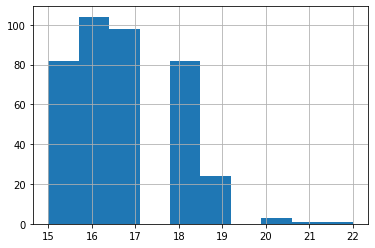

In [129]:
  #checking the age column
stud_math.age.hist()
stud_math.age.describe()

count    394.000000
mean      16.682741
std        1.249267
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       21.000000
Name: age, dtype: float64

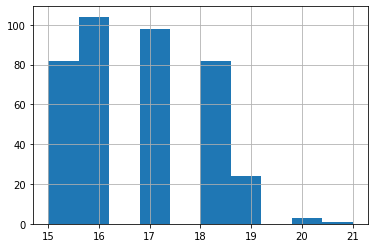

In [130]:
#removing the outliers for age column
stud_math.age = remove_outlier(stud_math.age)
stud_math.age.hist()
stud_math.age.describe()

In [131]:
 #checking the address column
stud_math.address.value_counts()

U    295
R     83
Name: address, dtype: int64

In [132]:
 #checking the family_size column
stud_math.family_size.value_counts()

GT3    261
LE3    107
Name: family_size, dtype: int64

In [133]:
#updating the family_size column with more clear values
stud_math.family_size[stud_math.family_size == 'GT3'] = 'less_or_equal_3'
stud_math.family_size[stud_math.family_size == 'LE3'] = 'more_than_3'
stud_math.family_size.value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


less_or_equal_3    261
more_than_3        107
Name: family_size, dtype: int64

In [134]:
 #checking the parents_status column
stud_math.parents_status.value_counts()

T    314
A     36
Name: parents_status, dtype: int64

In [135]:
#updating the parents_status column with more clear values
stud_math.parents_status[stud_math.parents_status == 'T'] = 'together'
stud_math.parents_status[stud_math.parents_status == 'A'] = 'separate'
stud_math.parents_status.value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


together    314
separate     36
Name: parents_status, dtype: int64

In [136]:
 #checking the mother_edu column
 stud_math.mother_edu.value_counts()

4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: mother_edu, dtype: int64

In [137]:
#checking the father_edu column
stud_math.father_edu.value_counts()

2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: father_edu, dtype: int64

In [139]:
#removing the wrong value
stud_math.father_edu = remove_wrongvalue(stud_math.father_edu,4,0)
stud_math.father_edu.value_counts()

2.0    106
3.0     96
4.0     88
1.0     78
0.0      2
Name: father_edu, dtype: int64

In [140]:
#checking the mother_job column
stud_math.mother_job.value_counts()

other       133
services     98
at_home      58
teacher      55
health       32
Name: mother_job, dtype: int64

In [141]:
#checking the father_job column
stud_math.father_job.value_counts()

other       197
services    102
teacher      29
at_home      16
health       15
Name: father_job, dtype: int64

In [142]:
#checking the reason column
stud_math.reason.value_counts()

course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64

In [143]:
#checking the guardian column
stud_math.guardian.value_counts()

mother    250
father     86
other      28
Name: guardian, dtype: int64

In [144]:
#checking the travel_time column
stud_math.travel_time.value_counts()

1.0    242
2.0     96
3.0     22
4.0      7
Name: travel_time, dtype: int64

In [145]:
#checking the study_time column
stud_math.travel_time.value_counts()

1.0    242
2.0     96
3.0     22
4.0      7
Name: travel_time, dtype: int64

In [146]:
#checking the failures column
stud_math.failures.value_counts()

0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

In [147]:
#checking the school_sup column
stud_math.school_sup.value_counts()

no     335
yes     51
Name: school_sup, dtype: int64

In [148]:
#checking the family_sup column
stud_math.family_sup.value_counts()

yes    219
no     137
Name: family_sup, dtype: int64

In [149]:
#checking the paid_classes column
stud_math.paid_classes.value_counts()

no     200
yes    155
Name: paid_classes, dtype: int64

In [150]:
#checking the activities column
stud_math.activities.value_counts()

yes    195
no     186
Name: activities, dtype: int64

In [151]:
#checking the nursery column
stud_math.nursery.value_counts()

yes    300
no      79
Name: nursery, dtype: int64

In [152]:
#removing the study_time_granular column from the dataset
stud_math.drop(['study_time_granular'], inplace = True, axis = 1)

In [153]:
#checking the higher column
stud_math.higher.value_counts()

yes    356
no      19
Name: higher, dtype: int64

In [154]:
#checking the internet column
stud_math.internet.value_counts()

yes    305
no      56
Name: internet, dtype: int64

In [168]:
#checking the romantic column
stud_math.romantic[stud_math.romantic=='yes'] = True
stud_math.romantic[stud_math.romantic=='no'] = False

stud_math.romantic.value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


False    240
True     124
Name: romantic, dtype: int64

In [156]:
#checking the family_rel column
stud_math.family_rel.value_counts()

 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: family_rel, dtype: int64

In [157]:
#removing the wrong value from family_rel column
stud_math.family_rel = remove_wrongvalue(stud_math.family_rel,5,1)
stud_math.family_rel.value_counts()

4.0    182
5.0     99
3.0     62
2.0     17
1.0      7
Name: family_rel, dtype: int64

In [158]:
#checking the free_time column
stud_math.free_time.value_counts()

3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: free_time, dtype: int64

In [159]:
#checking the go_out column
stud_math.go_out.value_counts()

3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
Name: go_out, dtype: int64

In [160]:
#checking the health column
stud_math.health.value_counts()

5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64

In [161]:
#checking the absences column
stud_math.absences.value_counts()

0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
14.0      12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

In [162]:
#removing the outlier values from absences column
stud_math.absences = remove_outlier(stud_math.absences)
stud_math.absences.value_counts()

0.0     111
2.0      60
4.0      53
6.0      31
8.0      21
10.0     17
12.0     12
14.0     12
3.0       8
16.0      7
7.0       6
18.0      5
5.0       5
20.0      4
1.0       3
9.0       3
11.0      2
13.0      2
15.0      2
19.0      1
17.0      1
Name: absences, dtype: int64

In [163]:
#checking the score column
stud_math.score.value_counts()

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

In [164]:
#removing the outlier values from score column
stud_math.score = remove_outlier(stud_math.score)
stud_math.score.value_counts()

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

In [169]:
#large correlation table between numeral columns
stud_math.corr()

,age,mother_edu,father_edu,travel_time,study_time,failures,family_rel,free_time,go_out,health,absences,score
age,1.000000,-0.167883,-0.147779,0.090864,-0.002354,0.195891,0.051487,0.021067,0.119997,-0.047402,0.129016,-0.153518
mother_edu,-0.167883,1.000000,0.629956,-0.173515,0.078589,-0.245463,-0.020896,0.025335,0.064164,-0.045051,0.065712,0.213349
father_edu,-0.147779,0.629956,1.000000,-0.155459,0.008603,-0.271936,-0.035788,-0.021415,0.046581,0.022588,-0.021415,0.130002
travel_time,0.090864,-0.173515,-0.155459,1.000000,-0.102206,0.064699,-0.028220,-0.021937,0.037636,-0.021531,-0.047995,-0.070559
study_time,-0.002354,0.078589,0.008603,-0.102206,1.000000,-0.178992,0.028918,-0.121969,-0.051280,-0.080016,-0.078099,0.115741
failures,0.195891,-0.245463,-0.271936,0.064699,-0.178992,1.000000,0.011942,0.098382,0.120914,0.081284,0.081801,-0.344338
family_rel,0.051487,-0.020896,-0.035788,-0.028220,0.028918,0.011942,1.000000,0.164324,0.069241,0.097910,-0.073509,0.051219
free_time,0.021067,0.025335,-0.021415,-0.021937,-0.121969,0.098382,0.164324,1.000000,0.296437,0.061575,0.093436,0.019026
go_out,0.119997,0.064164,0.046581,0.037636,-0.051280,0.120914,0.069241,0.296437,1.000000,-0.015608,0.111587,-0.129685
health,-0.047402,-0.045051,0.022588,-0.021531,-0.080016,0.081284,0.097910,0.061575,-0.015608,1.000000,-0.014358,-0.070460


In [181]:
#filtering the positive correlation values to make a short summary
stud_corr = stud_math.corr()
for corr in stud_corr:
  stud_corr[corr][stud_corr[corr]<0.1] = None
stud_corr

,age,mother_edu,father_edu,travel_time,study_time,failures,family_rel,free_time,go_out,health,absences,score
age,1.000000,NaN,NaN,NaN,NaN,0.195891,NaN,NaN,0.119997,NaN,0.129016,NaN
mother_edu,NaN,1.000000,0.629956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.213349
father_edu,NaN,0.629956,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.130002
travel_time,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
study_time,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.115741
failures,0.195891,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.120914,NaN,NaN,NaN
family_rel,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.164324,NaN,NaN,NaN,NaN
free_time,NaN,NaN,NaN,NaN,NaN,NaN,0.164324,1.000000,0.296437,NaN,NaN,NaN
go_out,0.119997,NaN,NaN,NaN,NaN,0.120914,NaN,0.296437,1.000000,NaN,0.111587,NaN
health,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


Результаты оценки корреляции:

1)	Часто образование родителей находится на одном уровне

2)	Чем выше уровень образования родителей – тем выше оценка у их детей

3)	Чем больше у детей свободного времени после школы – тем больше времени они проводят с друзьями

4)	Чем больше времени дети тратят на  учёбу помимо школы – тем выше их оценка

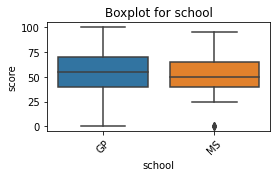

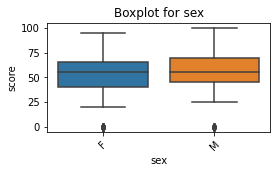

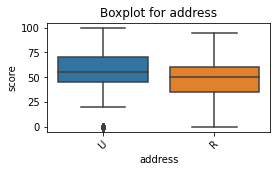

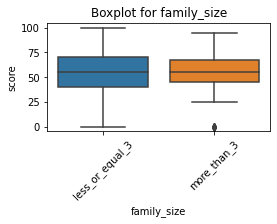

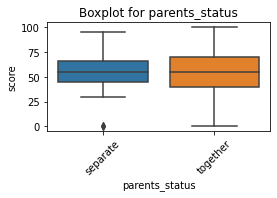

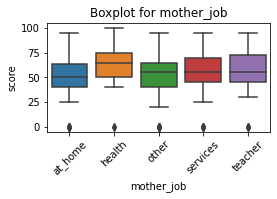

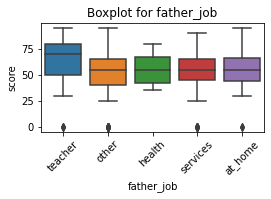

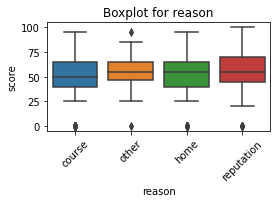

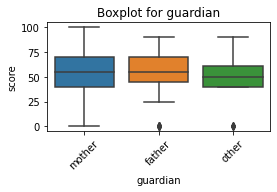

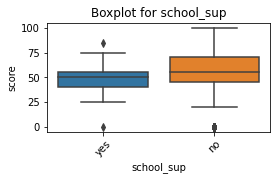

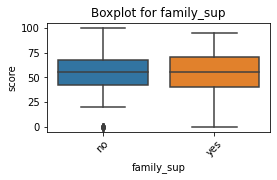

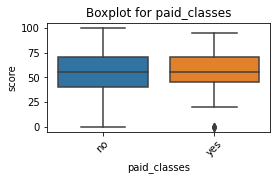

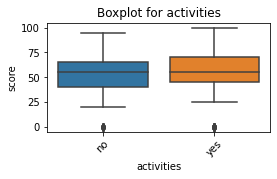

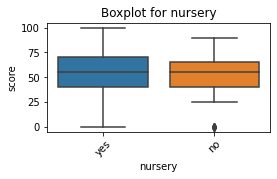

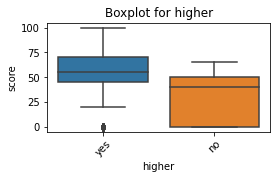

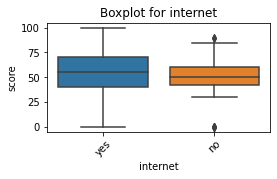

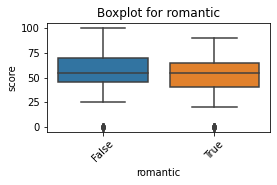

In [204]:
#creating a boxplot for non-numeric nominative values
for col in ['school', 'sex', 'address', 'family_size', 'parents_status',
       'mother_job', 'father_jo b', 'reason', 'guardian', 'school_sup', 'family_sup', 'paid_classes', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

In [192]:
#performing a Student test for non-numeric values
for col in ['school', 'sex', 'address', 'family_size', 'parents_status',
       'mother_job', 'father_job', 'reason', 'guardian', 'school_sup', 'family_sup', 'paid_classes', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки mother_job


Как мы видим, серьёзно отличается только параметр mother_job


В результате EDA для анализа влияния условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, были получены следующие выводы:

•	В данных достаточно много пустых значений.

•	Выбросы найдены только в столбцах с возрастом учеников и пропущенных днях

•	В столбцах об образовании отца и отношениях в семье были найдены неправильные значения

•	Положительная корреляция параметров образования родителей – говорит о тенденции проводить время с подходящим человеком

•	Чем больше у детей свободного времени после школы – тем больше времени они проводят с друзьями

•	Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это mother_edu, father_edu, study_time и mother_job.
